# Vehicle Performance Prediction
## Abstract:
Most players in the automotive sector are investing in ML for their marketing efforts, a 
much smaller group is putting in place incentives and key performance indicators 
(KPIs) to use more ML and automation. Closing the gap requires a stronger commitment 
to developing ML capability that is not just useful but also used.
## Problem Statement:
Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled 
per litre)


# Importing necessary libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

# Importing and reading the data

In [28]:
df=pd.read_csv("data.csv")
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


## Null Check

In [29]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

We can see that there are no null values

# Dropping Name column since it's not relevent

In [30]:
df=df.drop('name',axis=1)

In [31]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443


# EDA

In [32]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


We can see that the mean KmPL is around 10. We can also see that all the cars were manufactured between the years 1970 and 1982

In [33]:
df.dtypes


origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
Kilometer_per_liter    float64
dtype: object

We can see that horsepower which should ideally be in numeric is in categorical

# Checking why Horsepower is object

In [34]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

It is because there is an '?' there

Dropping the '?'

In [35]:
df.drop(df[df.horsepower=="?"].index, axis = 0, inplace = True)
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Now we can convert horsepower to numeric

In [36]:
df.horsepower = df.horsepower.astype('int64')

In [37]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower               int64
weight                   int64
acceleration           float64
year                     int64
Kilometer_per_liter    float64
dtype: object

In [38]:
df.corr()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,0.565209
cylinders,-0.568932,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
displacement,-0.614535,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
horsepower,-0.455171,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
weight,-0.585005,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acceleration,0.212746,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
year,0.181528,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
Kilometer_per_liter,0.565209,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


<AxesSubplot:>

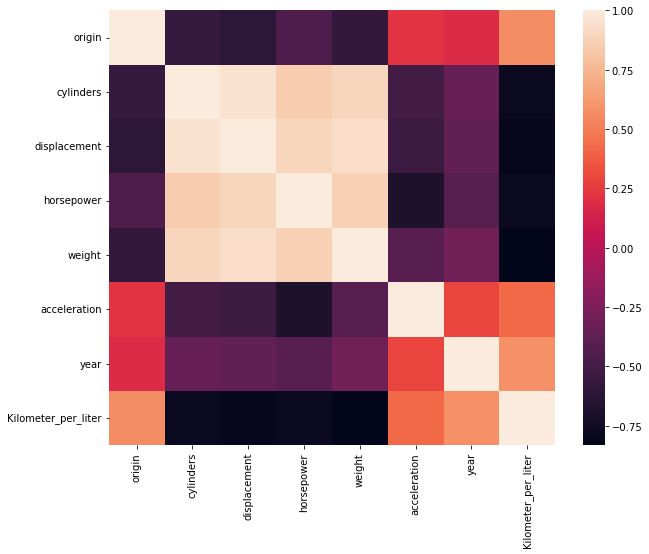

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

We can see that cylinders, displcement, horsepower and weight have very little to do with our target variable. It may be better to drop them. But we'll see what happens when we include them

# Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop(["Kilometer_per_liter"], axis = 1)
X = scaler.fit_transform(x)
Y = df['Kilometer_per_liter']
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

# Modelling

In [22]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [23]:
from statsmodels.tools.eval_measures import rmse
sgd.fit(x_train, y_train)

SGDRegressor()

In [24]:
sgd.score(x_test,y_test)

0.7664871937856585

The score is not bad but it is not good either

Let's now assess our model using some commonly used metrics

In [26]:
y_sgd_pred_normal = sgd.predict(x_test)
r_sgd_normal = sgd.score(x_train,y_train)
print("R-squared = ", r_sgd_normal)
rmse_sgd_normal = rmse(y_sgd_pred_normal,y_test)
print("Rmse = ", rmse_sgd_normal)

R-squared =  0.7858555380220659
Rmse =  1.6092126849962611


# Now let's drop the columns found redundant in heatmap and try again

In [41]:
x = df.drop(["Kilometer_per_liter","cylinders","displacement","horsepower","weight"], axis = 1)
X = scaler.fit_transform(x)
Y = df['Kilometer_per_liter']
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [42]:
sgd.fit(x_train, y_train)
sgd.score(x_test,y_test)

0.5880706008447016

# Conclusion

We can see that even though those columns may be lowly correlated with our target variable they do help prdicting it in some way. So it's better to keep them in.